In [1]:
import numpy as np

In [36]:
#Simple function for prediction
def predict_y(x,betas):
    # give x as a column vector
    # betas = list of beta_0 and beta_1

    b0 = betas[0]
    b1 = betas[1]

    ycap = b0 + b1*x

    return ycap
    #so this function will return a column vector of ycap


def loss(x,y,betas):
    # give x anf y as column vectors

    #get prediction using predict function
    y_predicted = predict_y(x=x,betas=betas)

    #now calculate the residuals in prediction
    residuals = np.subtract(y,y_predicted)

    #calculate the loss
    loss = (1/(len(x)))*np.sum(residuals)

    #rerun loss
    return loss

def gradient(x,y,betas):
    #give x, y in column vector form
    #first predict the ycap using predict function
    y_predicted = predict_y(x=x,betas=betas)

    #now calculate the gradients
    d_b0 = (2/len(x))*(np.sum(np.subtract(y_predicted, y)))

    d_b1=(2/len(x))*np.sum(np.multiply(np.subtract(y_predicted,y),x))
    
    return d_b0,d_b1


#define the main function

def train(data,lr, iterations):
    #data is a 2D numpy array
    # lr = learning rate
    # iterations = number of iterations


    #separate x data and y data 
    x = data[:,0]
    y = data[:,1]
     
    #first initialize some beta values
    beta_values = [0,0]

    #predict y values, calculate loss and update the beta values for each iteration
    for i in range(iterations):

        #predict using these beta values
        y_predicted = predict_y(x=x,betas=beta_values)
 
        

        #get the gradients 
        b0_gradient, b1_gradient = gradient(x,y,beta_values)
        
        #update b0
        beta_values[0] =  beta_values[0] - b0_gradient*lr

        #update b1 
        beta_values[1] = beta_values[1] - b1_gradient*lr
    
    #finally returns the betas vector with the last updated values
    return beta_values


### Load data

In [23]:
#import data
import pandas as pd

df = pd.read_csv('Salary_Data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39.343
1,1.3,46.205
2,1.5,37.731
3,2.0,43.525
4,2.2,39.891


In [24]:
#Extract features and output
X = df.iloc[:,1:len(df.columns)]

y = df.iloc[:,-1]

### Do with sklearn

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [26]:
# Split into train test
from sklearn.model_selection import train_test_split

X_train,  X_test,y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=42)
print(X_train.shape,y_train.shape,X_test.shape, y_test.shape)

(20, 1) (20,) (10, 1) (10,)


In [55]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

#train the model
model.fit(X=X,y=y)

LinearRegression()

In [56]:
#get the model parameters
print(f'Intercept (sklearn):{model.intercept_} ')

print(f'Coefficients (sklearn):{model.coef_} ')


# make predictions and calcualte mean absolute error
y_preds_sklearn = model.predict(X=X)

mae = mean_absolute_error(y_true=y,y_pred= y_preds_sklearn)

mse = mean_squared_error(y_true=y, y_pred=y_preds_sklearn)
print(f'Mean absolute error: {mae}')
print(f'Mean squared error: {mse}')

Intercept (sklearn):-2.842170943040401e-14 
Coefficients (sklearn):[1.] 
Mean absolute error: 1.0894988614988204e-14
Mean squared error: 2.1541161785235095e-28


### Do with your model

In [57]:
#convert data into numpy arrays
data = df.to_numpy(dtype=float)
X = X.to_numpy(dtype=float)
y = y.to_numpy(dtype=float)

In [102]:
# train the model and get the beta values
lR = 0.001
its = 1
optimal_betas = train(data,lr=lR,iterations=its)
print(f'Intercept: {optimal_betas[0]},\nCoefficient: {optimal_betas[1]}')

# predict for X_test
y_preds = predict_y(X,optimal_betas)

# get the mse

print(f'mse: {mean_squared_error(y,y_preds)}')

Intercept: 0.15200599999999997,
Coefficient: 0.9547973999999999
mse: 12.265988737352197


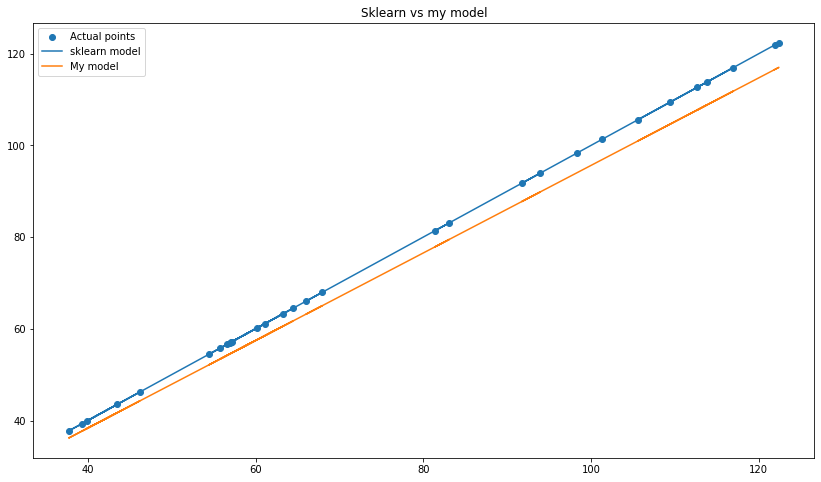

In [103]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (14,8)

#first plot the original data
plt.scatter(X,y,label = 'Actual points')

#plot the sklearn predicted line
plt.plot(X,y_preds_sklearn, label = 'sklearn model')
plt.title('sklearn model')
plt.legend()

#my precited line
plt.plot(X,y_preds,label = 'My model')

plt.title('Sklearn vs my model')
plt.legend()
plt.show()


### Only my model

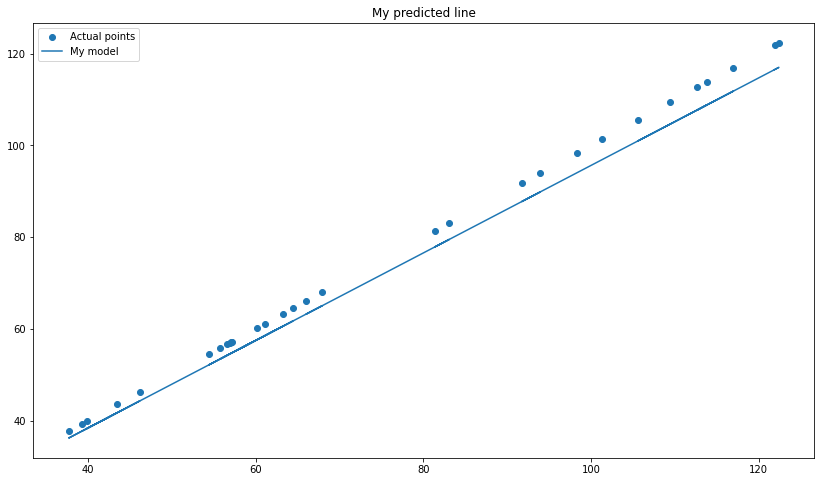

In [104]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (14,8)

#first plot the original data
plt.scatter(X,y,label = 'Actual points')

#my precited line
plt.plot(X,y_preds,label = 'My model')

plt.title('My predicted line')
plt.legend()
plt.show()

### Plot for iterations and loss


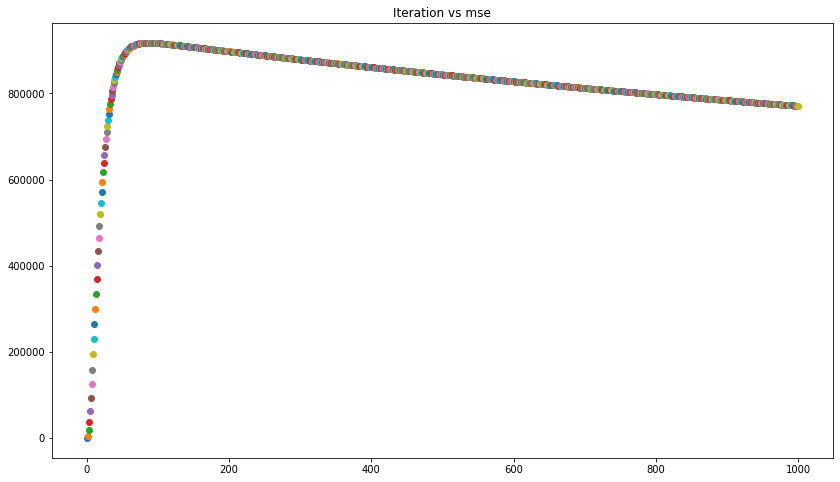

In [105]:
for i in range(1,1000):
    y_prediction = predict_y(X,betas=train(data,lr=0.001,iterations=i))
    mse = mean_squared_error(X,y_prediction)
    plt.scatter(i,mse)
plt.title('Iteration vs mse')
plt.show()

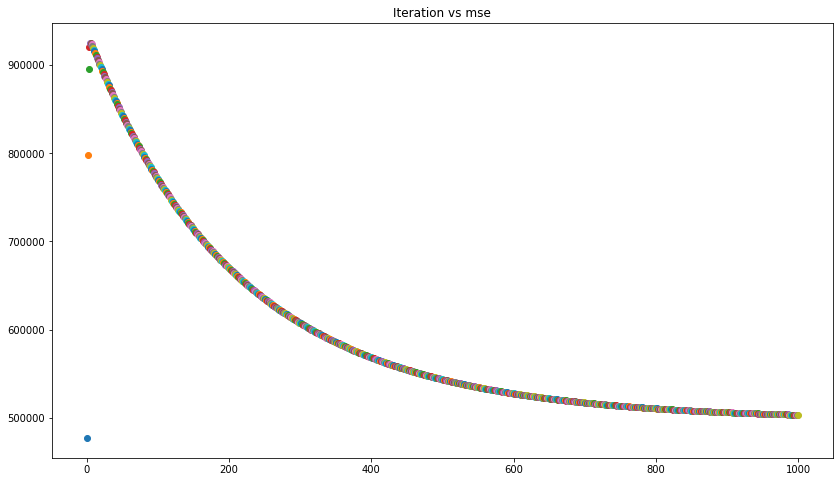

In [106]:
for i in range(1,1000):
    y_prediction = predict_y(X,betas=train(data,lr=0.01,iterations=i))
    mse = mean_squared_error(X,y_prediction)
    plt.scatter(i,mse)
plt.title('Iteration vs mse')
plt.show()